In [106]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [71]:
x,y=make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

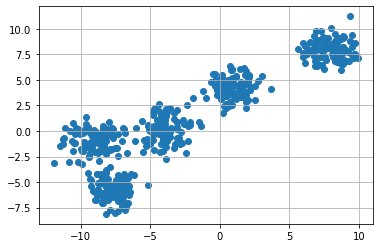

In [72]:
plt.figure(0)
plt.grid(True)
plt.scatter(x[:,0],x[:,1])
plt.show()

In [73]:
k=5
color=["green","red","blue","yellow","orange"]
clusters={}

for i in range(k):
    center=10*(2*np.random.random((x.shape[1],))-1)
    points=[]
    cluster={
        'center':center,
        'points':points,
        'color':color[i]
    }
    clusters[i]=cluster

In [74]:
clusters

{0: {'center': array([-9.74431101,  5.46794757]),
  'points': [],
  'color': 'green'},
 1: {'center': array([-3.73324075,  3.85821697]),
  'points': [],
  'color': 'red'},
 2: {'center': array([-2.27418775, -6.51393406]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([-5.28036602, -7.91143373]),
  'points': [],
  'color': 'yellow'},
 4: {'center': array([-7.28475196,  5.37767143]),
  'points': [],
  'color': 'orange'}}

In [75]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [13]:
#v1=np.array([1,2])
#v2=np.array([3,5])
#distance(v1,v2)

# E_step and M_step


In [103]:
#E_step

def assignpoint(clusters): 
    for ix in range(x.shape[0]):
        dist=[]
        curr_x=x[ix]

        for kx in range(k):
            d=distance(curr_x,clusters[kx]['center'])
            dist.append(d)
        current_cluster=np.argmin(dist)

        clusters[current_cluster]['points'].append(curr_x)
assignpoint(clusters)
        

#   M_STEP


def updatecluster(clusters):
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0:
            new_u=pts.mean(axis=0)
            clusters[kx]['center']=new_u
            clusters[kx]['points']=[]
            



def plotcluster(clusters):
    for kx in range(k):
        #print(len(clusters[kx]['points']))
        
        pts=np.array(clusters[kx]['points'])
        #print(pts.shape)
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass
        
        uk=clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color='black',marker="*")

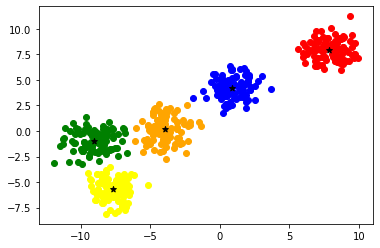

In [104]:
plotcluster(clusters)

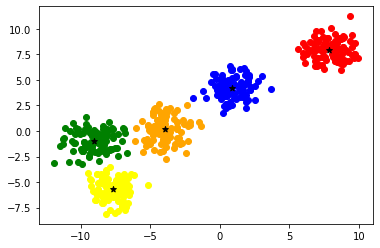

In [98]:
assignpoint(clusters)
plotcluster(clusters)
updatecluster(clusters)

# using KMeans++ algorithm

In [109]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(x,y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [114]:
centers=kmeans.cluster_centers_

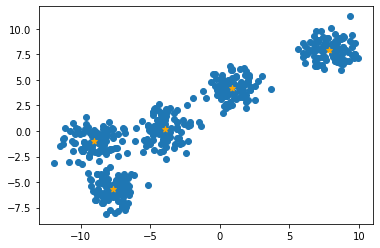

In [120]:
plt.scatter(x[:,0],x[:,1])
plt.scatter(centers[:,0],centers[:,1],marker="*",color='orange')
plt.show()

In [121]:
pred=kmeans.labels_
print(pred)

[4 2 3 4 4 3 1 4 2 4 2 3 2 4 3 4 2 4 4 2 0 0 4 3 4 0 1 1 3 1 4 1 0 0 4 0 2
 2 4 0 0 0 1 1 3 2 2 1 1 1 2 4 1 4 4 0 4 4 2 3 2 3 3 4 1 2 3 3 0 3 0 4 0 4
 0 3 4 1 0 0 3 0 3 1 2 1 3 2 1 3 1 0 4 0 0 2 4 3 3 0 2 0 3 3 2 2 2 3 3 4 2
 1 4 2 3 0 2 1 0 3 2 3 1 4 0 1 1 1 4 4 3 3 4 2 2 1 3 1 3 4 4 0 3 2 1 4 2 2
 4 3 4 4 3 3 2 0 0 1 3 4 0 2 1 0 2 0 2 0 0 0 1 4 0 2 0 1 4 3 2 1 2 4 2 0 1
 1 0 4 3 2 0 3 1 4 1 0 3 1 4 4 4 0 0 2 4 1 1 4 2 4 4 4 0 2 3 2 4 4 2 1 3 1
 1 0 4 3 4 3 1 0 3 3 4 0 4 0 3 2 3 0 0 2 4 4 3 3 0 2 0 4 1 2 1 4 1 1 1 1 2
 0 2 4 0 2 1 3 2 2 2 1 4 4 3 0 0 2 3 3 4 3 1 3 2 2 1 1 0 1 1 2 0 4 3 0 3 1
 3 3 2 4 0 2 0 0 4 1 0 3 0 1 4 4 3 2 0 1 2 0 3 1 2 1 4 0 1 3 3 0 0 0 4 1 0
 4 2 3 3 1 2 2 3 3 1 0 0 0 4 1 2 1 4 0 2 2 3 0 0 1 0 1 3 3 3 1 0 4 0 3 1 1
 2 4 2 1 4 1 3 2 0 2 3 4 4 2 2 0 2 0 1 3 2 1 4 4 2 3 0 1 4 4 4 1 2 0 2 2 2
 1 0 3 2 3 3 1 3 4 3 4 2 0 0 4 2 1 4 0 3 2 1 3 1 1 2 1 3 1 2 1 3 1 4 0 0 1
 0 2 0 0 1 4 4 3 1 0 3 1 3 2 3 2 4 0 3 4 3 4 4 0 4 0 1 2 2 3 4 4 1 1 2 1 1
 2 1 2 2 2 1 0 1 3 2 3 3 

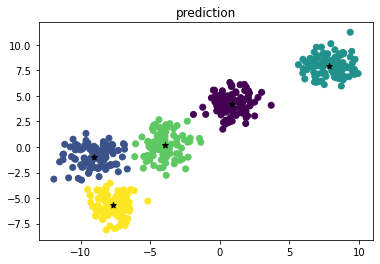

In [124]:
plt.scatter(x[:,0],x[:,1],c=pred)
plt.scatter(centers[:,0],centers[:,1],marker="*",color='black')
plt.title('prediction')
plt.show()

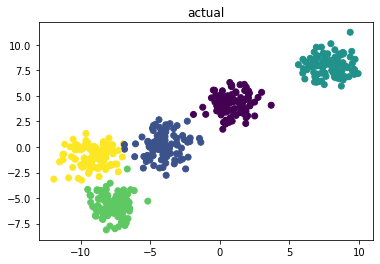

In [126]:
plt.scatter(x[:,0],x[:,1],c=y)
#plt.scatter(centers[:,0],centers[:,1],marker="*",color='black')
plt.title('actual')
plt.show()